In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.utils import shuffle

%matplotlib inline

# Clustering: K-means

In [ ]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

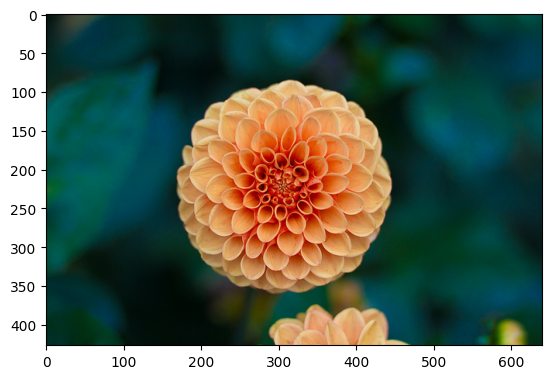

In [ ]:
flower = load_sample_image('flower.jpg')
flower = np.array(flower, dtype=np.float64) / 255

plt.imshow(flower)

In [ ]:
w, h, d = original_shape = tuple(flower.shape)

assert d == 3
image_array = np.reshape(flower, (w*h, d))

In [ ]:
image_sample = shuffle(image_array, random_state=42)[:1000]

# Fit K-means
n_colors = 4
kmeans = KMeans(n_clusters = n_colors, random_state=42).fit(image_sample)

# get color indices for full image
labels = kmeans.predict(image_array)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
def reconstruct_image(cluster_centers, labels, w, h):
  d = cluster_centers.shape[1]
  image = np.zeros((w, h, d))
  label_index = 0
  for i in range(w):
    for j in range(h):
      image[i][j] = cluster_centers[labels[label_index]]
      label_index += 1
  return image

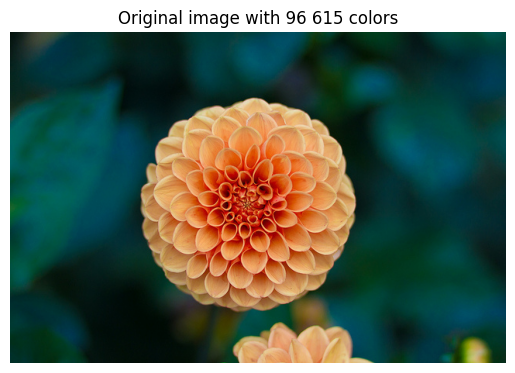

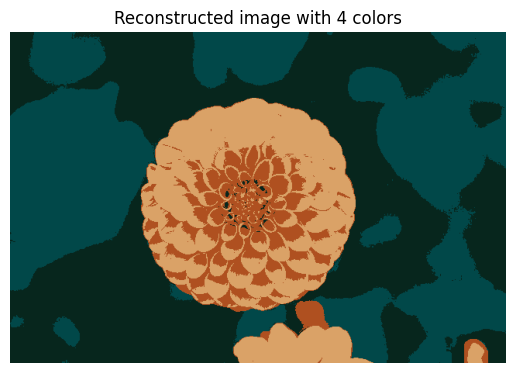

In [ ]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96 615 colors')

plt.imshow(flower)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')

plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h))


# PCA

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [ ]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [ ]:
print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')

Explained variance ratio from PCA: [0.92461872 0.05306648]


In [ ]:
colors = ['#003f5c', '#bc5090', '#ffa600']
lw = 2

Text(0.5, 1.0, 'PCA of Iris Dataset')

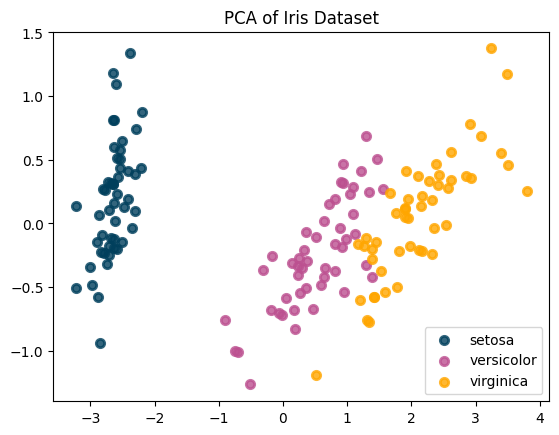

In [ ]:
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(X_r[y==i, 0], X_r[y==i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Iris Dataset')